In [1]:
import pandas as pd
df = pd.read_csv('c:/data/time/data2.csv')
df.head()

,date,price
0,1991-01-01,12588862
1,1991-02-01,12154321
2,1991-03-01,14337072
3,1991-04-01,15108570
4,1991-05-01,17225734


In [2]:
#date의 타입 변경(str => datetime)
df['date'] = pd.to_datetime(df['date'])

In [3]:
#date를 인덱스로 설정
df = df.set_index('date')
df.head()

,price
date,
1991-01-01,12588862
1991-02-01,12154321
1991-03-01,14337072
1991-04-01,15108570
1991-05-01,17225734


<AxesSubplot:xlabel='date'>

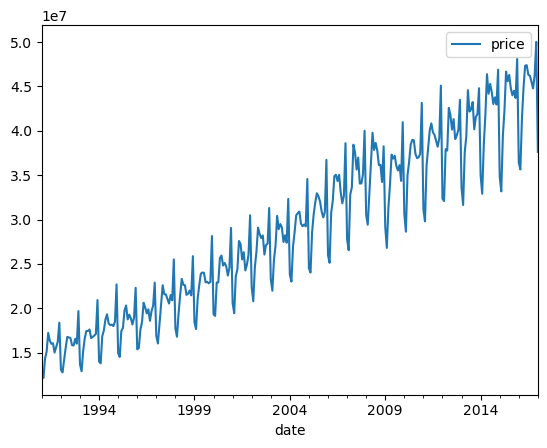

In [4]:
df.plot()

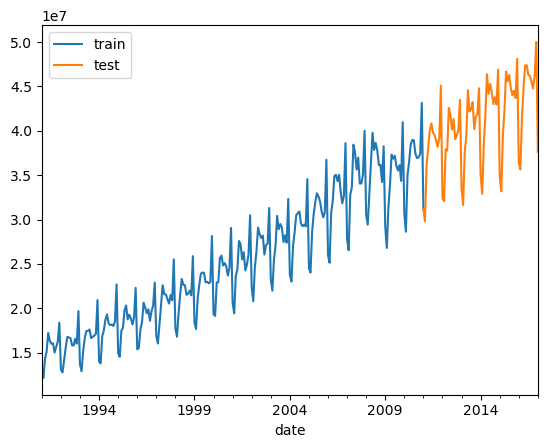

In [5]:
#학습용, 검증용 데이터 분할
import matplotlib.pyplot as plt
split_date = pd.Timestamp('01-01-2011')
train = df.loc[:split_date, ['price']]
test = df.loc[split_date:, ['price']]
ax = train.plot()
test.plot(ax=ax)
plt.legend(['train', 'test'])
plt.show()

In [6]:
#스케일링
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
sc.fit(train)
train_sc = sc.transform(train)
test_sc = sc.transform(test)
train_sc[:10]

array([[0.01402033],
       [0.        ],
       [0.0704258 ],
       [0.09531795],
       [0.16362761],
       [0.13514108],
       [0.12395846],
       [0.12617398],
       [0.09230917],
       [0.11139526]])

In [8]:
#데이터 프레임으로 변환
train_sc_df = pd.DataFrame(train_sc, columns=['Scaled'], index=train.index)
test_sc_df = pd.DataFrame(test_sc, columns=['Scaled'], index=test.index)
train_sc_df.head()

,Scaled
date,
1991-01-01,0.014020
1991-02-01,0.000000
1991-03-01,0.070426
1991-04-01,0.095318
1991-05-01,0.163628


In [9]:
#과거값 12개로 현재값 예측하기
for s in range(1, 13):
    train_sc_df['shift_{}'.format(s)] = train_sc_df['Scaled'].shift(s)
    test_sc_df['shift_{}'.format(s)] = test_sc_df['Scaled'].shift(s)
train_sc_df.head(13)

,Scaled,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,shift_10,shift_11,shift_12
date,,,,,,,,,,,,,
1991-01-01,0.014020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-02-01,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-03-01,0.070426,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-04-01,0.095318,0.070426,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-05-01,0.163628,0.095318,0.070426,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-06-01,0.135141,0.163628,0.095318,0.070426,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-07-01,0.123958,0.135141,0.163628,0.095318,0.070426,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN,NaN
1991-08-01,0.126174,0.123958,0.135141,0.163628,0.095318,0.070426,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN
1991-09-01,0.092309,0.126174,0.123958,0.135141,0.163628,0.095318,0.070426,0.000000,0.014020,NaN,NaN,NaN,NaN


In [10]:
#결측값 제거
# 독립변수: shift_1 ~ shift_12
X_train = train_sc_df.dropna().drop('Scaled', axis=1)
# 종속변수: Scaled
y_train = train_sc_df.dropna()[['Scaled']]

X_test = test_sc_df.dropna().drop('Scaled', axis=1)
y_test = test_sc_df.dropna()[['Scaled']]

In [11]:
#넘파이배열로 저장
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values
print(X_train)
print(y_train)

[[0.20091289 0.13173822 0.11139526 ... 0.0704258  0.         0.01402033]
 [0.03002688 0.20091289 0.13173822 ... 0.09531795 0.0704258  0.        ]
 [0.01999285 0.03002688 0.20091289 ... 0.16362761 0.09531795 0.0704258 ]
 ...
 [0.80210057 0.79916654 0.81439355 ... 0.59734863 0.92972161 0.71629034]
 [0.81482896 0.80210057 0.79916654 ... 0.53166512 0.59734863 0.92972161]
 [1.         0.81482896 0.80210057 ... 0.73605008 0.53166512 0.59734863]]
[[0.03002688]
 [0.01999285]
 [0.06596369]
 [0.10983126]
 [0.14912986]
 [0.14718865]
 [0.14464787]
 [0.11898427]
 [0.11802682]
 [0.14222108]
 [0.12459168]
 [0.24290801]
 [0.04899091]
 [0.02408276]
 [0.09865054]
 [0.14480155]
 [0.17061844]
 [0.17067229]
 [0.17603636]
 [0.1449117 ]
 [0.14957943]
 [0.15381982]
 [0.16036484]
 [0.28308682]
 [0.05971347]
 [0.05306762]
 [0.15199345]
 [0.17230214]
 [0.21246911]
 [0.23131079]
 [0.1982186 ]
 [0.19187716]
 [0.19381714]
 [0.18857277]
 [0.20528237]
 [0.33988685]
 [0.08949179]
 [0.07634802]
 [0.17110473]
 [0.181320

In [12]:
#케라스에 필요한 3차원 형태로 변환
X_train_t = X_train.reshape(X_train.shape[0], 12, 1)
X_test_t = X_test.reshape(X_test.shape[0], 12, 1)
print('최종 DATA')
print(X_train_t.shape)
print(X_train_t)
print(y_train)

최종 DATA
(229, 12, 1)
[[[0.20091289]
  [0.13173822]
  [0.11139526]
  ...
  [0.0704258 ]
  [0.        ]
  [0.01402033]]

 [[0.03002688]
  [0.20091289]
  [0.13173822]
  ...
  [0.09531795]
  [0.0704258 ]
  [0.        ]]

 [[0.01999285]
  [0.03002688]
  [0.20091289]
  ...
  [0.16362761]
  [0.09531795]
  [0.0704258 ]]

 ...

 [[0.80210057]
  [0.79916654]
  [0.81439355]
  ...
  [0.59734863]
  [0.92972161]
  [0.71629034]]

 [[0.81482896]
  [0.80210057]
  [0.79916654]
  ...
  [0.53166512]
  [0.59734863]
  [0.92972161]]

 [[1.        ]
  [0.81482896]
  [0.80210057]
  ...
  [0.73605008]
  [0.53166512]
  [0.59734863]]]
[[0.03002688]
 [0.01999285]
 [0.06596369]
 [0.10983126]
 [0.14912986]
 [0.14718865]
 [0.14464787]
 [0.11898427]
 [0.11802682]
 [0.14222108]
 [0.12459168]
 [0.24290801]
 [0.04899091]
 [0.02408276]
 [0.09865054]
 [0.14480155]
 [0.17061844]
 [0.17067229]
 [0.17603636]
 [0.1449117 ]
 [0.14957943]
 [0.15381982]
 [0.16036484]
 [0.28308682]
 [0.05971347]
 [0.05306762]
 [0.15199345]
 [0.172

In [13]:
#모델 생성 - LSTM
from keras.layers import LSTM, Dense
from keras.models import Sequential
model = Sequential()
model.add(LSTM(20, input_shape=(12,1)))
model.add(Dense(1)) # 출력층
model.compile(loss='mse', optimizer='adam')

In [14]:
#모델 학습
model.fit(X_train_t, y_train, epochs=250, batch_size=64, verbose=1)

Epoch 1/250
4/4 [==============================] - 10s 9ms/step - loss: 0.1893
Epoch 2/250
4/4 [==============================] - 0s 11ms/step - loss: 0.1215
Epoch 3/250
4/4 [==============================] - 0s 12ms/step - loss: 0.0694
Epoch 4/250
4/4 [==============================] - 0s 13ms/step - loss: 0.0346
Epoch 5/250
4/4 [==============================] - 0s 10ms/step - loss: 0.0159
Epoch 6/250
4/4 [==============================] - 0s 12ms/step - loss: 0.0120
Epoch 7/250
4/4 [==============================] - 0s 9ms/step - loss: 0.0152
Epoch 8/250
4/4 [==============================] - 0s 7ms/step - loss: 0.0173
Epoch 9/250
4/4 [==============================] - 0s 7ms/step - loss: 0.0155
Epoch 10/250
4/4 [==============================] - 0s 6ms/step - loss: 0.0122
Epoch 11/250
4/4 [==============================] - 0s 6ms/step - loss: 0.0107
Epoch 12/250
4/4 [==============================] - 0s 7ms/step - loss: 0.0102
Epoch 13/250
4/4 [==============================] - 0s 

In [17]:
#모델 평가
score = model.evaluate(X_test_t, y_test, verbose=0)
print(score)
y_pred = model.predict(X_test_t)
print(y_pred.flatten()[:10])
print(y_test.flatten()[:10])

0.002422936027869582
2/2 [==============================] - 0s 4ms/step
[0.68426055 0.67623866 0.81964684 0.86948246 0.91521454 0.9314564
 0.90935206 0.90145266 0.88791835 0.8788594 ]
[0.65198848 0.6431242  0.83176496 0.82666946 0.98182284 0.95616179
 0.90265615 0.94107108 0.86841056 0.88189991]


In [18]:
#스케일링된 값의 오차
import numpy as np
np.mean(y_test - y_pred)

0.018535085590327245

In [20]:
#실제값의 오차
y_predicted = sc.inverse_transform(y_pred)
y_tested = sc.inverse_transform(y_test)
np.mean(y_tested - y_predicted)

574469.1803278689

2/2 [==============================] - 0s 6ms/step


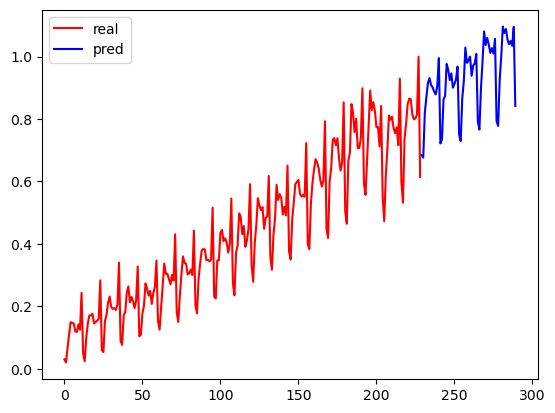

In [19]:
#시각화
pred = model.predict(X_test_t)
a = np.concatenate((y_train.flatten(), np.zeros(len(y_test)) + np.nan))
b = np.concatenate((np.zeros(len(y_train)) + np.nan, pred.flatten()))
plt.plot(a, 'r-', label='real')
plt.plot(b, 'b-', label='pred')
plt.legend()
plt.show()

In [21]:
#모델 생성 - SimpleRNN
from keras.layers import SimpleRNN
model = Sequential()
model.add(LSTM(20, input_shape=(12,1)))
model.add(Dense(1)) # 출력층
model.compile(loss='mse', optimizer='adam')

In [22]:
#모델 학습
model.fit(X_train_t, y_train, epochs=250, batch_size=64, verbose=1)

Epoch 1/250
4/4 [==============================] - 2s 10ms/step - loss: 0.2539
Epoch 2/250
4/4 [==============================] - 0s 13ms/step - loss: 0.2097
Epoch 3/250
4/4 [==============================] - 0s 12ms/step - loss: 0.1690
Epoch 4/250
4/4 [==============================] - 0s 11ms/step - loss: 0.1312
Epoch 5/250
4/4 [==============================] - 0s 11ms/step - loss: 0.0995
Epoch 6/250
4/4 [==============================] - 0s 8ms/step - loss: 0.0699
Epoch 7/250
4/4 [==============================] - 0s 6ms/step - loss: 0.0446
Epoch 8/250
4/4 [==============================] - 0s 7ms/step - loss: 0.0261
Epoch 9/250
4/4 [==============================] - 0s 6ms/step - loss: 0.0162
Epoch 10/250
4/4 [==============================] - 0s 7ms/step - loss: 0.0145
Epoch 11/250
4/4 [==============================] - 0s 7ms/step - loss: 0.0167
Epoch 12/250
4/4 [==============================] - 0s 9ms/step - loss: 0.0172
Epoch 13/250
4/4 [==============================] - 0s 7

In [23]:
#모델 평가
score = model.evaluate(X_test_t, y_test, verbose=0)
print(score)
y_pred = model.predict(X_test_t)
print(y_pred.flatten()[:10])
print(y_test.flatten()[:10])

0.004008722025901079
2/2 [==============================] - 0s 5ms/step
[0.6841569  0.6747462  0.8048063  0.8518736  0.8959364  0.9120568
 0.8931678  0.8856622  0.87238544 0.8684963 ]
[0.65198848 0.6431242  0.83176496 0.82666946 0.98182284 0.95616179
 0.90265615 0.94107108 0.86841056 0.88189991]


In [24]:
#스케일링된 값의 오차
import numpy as np
np.mean(y_test - y_pred)

0.03748556942839297

In [25]:
#실제값의 오차
y_predicted = sc.inverse_transform(y_pred)
y_tested = sc.inverse_transform(y_test)
np.mean(y_tested - y_predicted)

1161813.6721311475

2/2 [==============================] - 0s 3ms/step


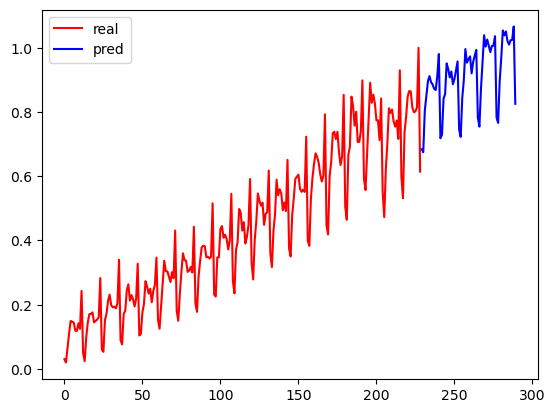

In [26]:
#시각화
pred = model.predict(X_test_t)
a = np.concatenate((y_train.flatten(), np.zeros(len(y_test)) + np.nan))
b = np.concatenate((np.zeros(len(y_train)) + np.nan, pred.flatten()))
plt.plot(a, 'r-', label='real')
plt.plot(b, 'b-', label='pred')
plt.legend()
plt.show()